In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('D:/uts/heart.csv')

In [4]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0
1,52,M,ATA,140,100,0,Normal,138,Y,0.0,Up,0
2,56,M,ASY,120,100,0,Normal,120,Y,1.5,Flat,1
3,69,M,ASY,140,110,1,Normal,109,Y,1.5,Flat,1
4,76,M,NAP,104,113,0,LVH,120,N,3.5,Down,1
...,...,...,...,...,...,...,...,...,...,...,...,...
741,44,M,ASY,135,491,0,Normal,135,N,0.0,Flat,1
742,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
743,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
744,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 70.1+ KB


In [6]:
df.shape

(746, 12)

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0
1,52,M,ATA,140,100,0,Normal,138,Y,0.0,Up,0
2,56,M,ASY,120,100,0,Normal,120,Y,1.5,Flat,1
3,69,M,ASY,140,110,1,Normal,109,Y,1.5,Flat,1
4,76,M,NAP,104,113,0,LVH,120,N,3.5,Down,1


In [8]:
df=df.replace({'Sex':{'M': 0, 'F': 1}})

In [9]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,56,0,ASY,120,85,0,Normal,140,N,0.0,Up,0
1,52,0,ATA,140,100,0,Normal,138,Y,0.0,Up,0
2,56,0,ASY,120,100,0,Normal,120,Y,1.5,Flat,1
3,69,0,ASY,140,110,1,Normal,109,Y,1.5,Flat,1
4,76,0,NAP,104,113,0,LVH,120,N,3.5,Down,1
...,...,...,...,...,...,...,...,...,...,...,...,...
741,44,0,ASY,135,491,0,Normal,135,N,0.0,Flat,1
742,53,0,NAP,145,518,0,Normal,130,N,0.0,Flat,1
743,32,0,ASY,118,529,0,Normal,130,N,0.0,Flat,1
744,67,1,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [10]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    370
NAP    169
ATA    166
TA      41
Name: count, dtype: int64

In [12]:
df=df.replace({'ChestPainType':{'ASY': 1, 'NAP': 2,'ATA': 3,'TA': 4}})

In [13]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,56,0,1,120,85,0,Normal,140,N,0.0,Up,0
1,52,0,3,140,100,0,Normal,138,Y,0.0,Up,0
2,56,0,1,120,100,0,Normal,120,Y,1.5,Flat,1
3,69,0,1,140,110,1,Normal,109,Y,1.5,Flat,1
4,76,0,2,104,113,0,LVH,120,N,3.5,Down,1
...,...,...,...,...,...,...,...,...,...,...,...,...
741,44,0,1,135,491,0,Normal,135,N,0.0,Flat,1
742,53,0,2,145,518,0,Normal,130,N,0.0,Flat,1
743,32,0,1,118,529,0,Normal,130,N,0.0,Flat,1
744,67,1,2,115,564,0,LVH,160,N,1.6,Flat,0


In [14]:
df['RestingECG'].value_counts()

RestingECG
Normal    445
LVH       176
ST        125
Name: count, dtype: int64

In [15]:
df=df.replace({'RestingECG':{'Normal': 1, 'LVH': 2, 'ST' :3}})

In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,56,0,1,120,85,0,1,140,N,0.0,Up,0
1,52,0,3,140,100,0,1,138,Y,0.0,Up,0
2,56,0,1,120,100,0,1,120,Y,1.5,Flat,1
3,69,0,1,140,110,1,1,109,Y,1.5,Flat,1
4,76,0,2,104,113,0,2,120,N,3.5,Down,1


In [17]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    459
Y    287
Name: count, dtype: int64

In [19]:
df=df.replace({'ExcerciseAngina':{'N': 0, 'Y': 1 }})

In [20]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,56,0,1,120,85,0,1,140,N,0.0,Up,0
1,52,0,3,140,100,0,1,138,Y,0.0,Up,0
2,56,0,1,120,100,0,1,120,Y,1.5,Flat,1
3,69,0,1,140,110,1,1,109,Y,1.5,Flat,1
4,76,0,2,104,113,0,2,120,N,3.5,Down,1
...,...,...,...,...,...,...,...,...,...,...,...,...
741,44,0,1,135,491,0,1,135,N,0.0,Flat,1
742,53,0,2,145,518,0,1,130,N,0.0,Flat,1
743,32,0,1,118,529,0,1,130,N,0.0,Flat,1
744,67,1,2,115,564,0,2,160,N,1.6,Flat,0


In [21]:
df=df.replace({'ExerciseAngina':{'N': 0, 'Y': 1 }})

In [22]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,56,0,1,120,85,0,1,140,0,0.0,Up,0
1,52,0,3,140,100,0,1,138,1,0.0,Up,0
2,56,0,1,120,100,0,1,120,1,1.5,Flat,1
3,69,0,1,140,110,1,1,109,1,1.5,Flat,1
4,76,0,2,104,113,0,2,120,0,3.5,Down,1
...,...,...,...,...,...,...,...,...,...,...,...,...
741,44,0,1,135,491,0,1,135,0,0.0,Flat,1
742,53,0,2,145,518,0,1,130,0,0.0,Flat,1
743,32,0,1,118,529,0,1,130,0,0.0,Flat,1
744,67,1,2,115,564,0,2,160,0,1.6,Flat,0


In [23]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    354
Up      349
Down     43
Name: count, dtype: int64

In [24]:
df=df.replace({'ST_Slope':{'Flat': 0, 'Up': 1,'Down': 2 }})

In [27]:
import seaborn as sns

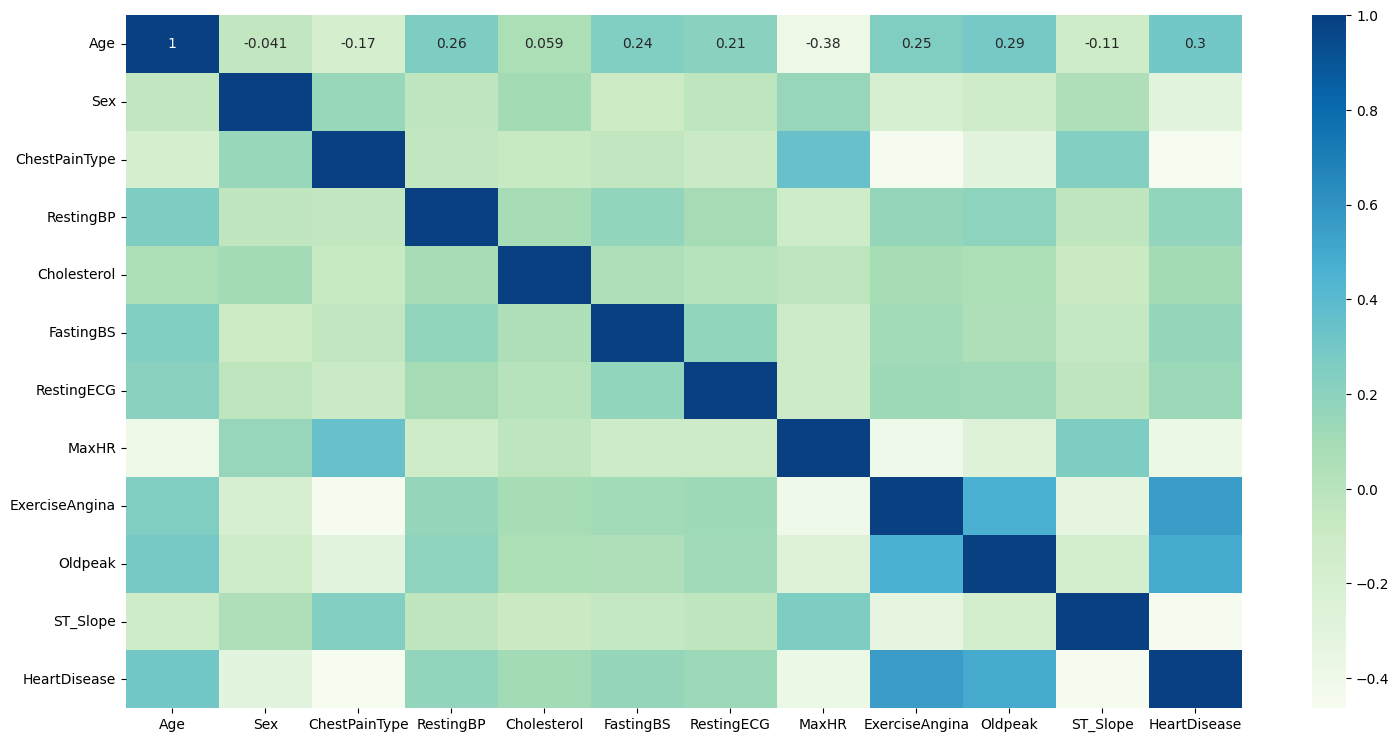

In [28]:
plt.figure(figsize = (18,9))
sns.heatmap(df.corr(), cmap='GnBu', annot=True)
plt.show()

<Axes: >

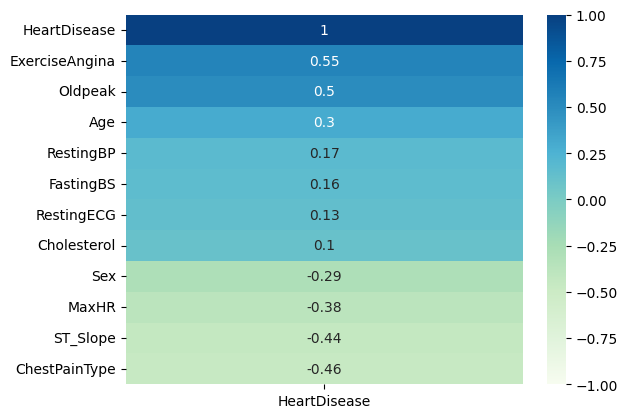

In [29]:
sns.heatmap(df.corr()[['HeartDisease']].sort_values(by='HeartDisease', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')

In [30]:
X = df.drop (columns='HeartDisease', axis=1)
Y = df['HeartDisease']

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(X)

StandardScaler()

In [33]:
standarized_data = scaler.transform(X)

In [34]:
X = standarized_data
Y = df['HeartDisease']

In [35]:
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(746, 11) (522, 11) (224, 11)


In [37]:
classifier = svm.SVC(kernel='linear')

In [38]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [39]:
x_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction, Y_train)

In [40]:
print('Tingkat akurasi data training = ', training_data_accuracy)

Tingkat akurasi data training =  0.8524904214559387


In [41]:
x_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(x_test_prediction, Y_test)

In [42]:
print('Tingkat akurasi data test = ', test_data_accuracy)

Tingkat akurasi data test =  0.8392857142857143


In [43]:
input_data = (56,0,1,120,85,0,1,140,0,0.0,1)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('Rendah Resiko')
else :
    print('Resiko Tinggi')

[[ 0.32822335 -0.56806253 -0.87608311 -0.75401921 -2.70047295 -0.44865159
  -0.74977228 -0.0092437  -0.79074163 -0.84094155  0.69639103]]
[0]
Rendah Resiko


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
import pickle
filename = 'penyakit_jantung.sav'
pickle.dump(classifier,open(filename,'wb'))